# greatpy vs Great 

For each file, the function returns a scatterplot allowing the comparison between the binomial and hypergeometric p-value of greatpy vs GREAT, the Pearson coefficient for each of these representations. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import greatpy as great
import pandas as pd
from math import inf
from numpy import log,nan, int64,cov,corrcoef
from scipy.stats import pearsonr
import os 
import re

import warnings
warnings.filterwarnings('ignore')

import time

## Compute the results from multiple files.

In [56]:
t = []

for path in os.listdir("../data/tests/test_data/input/"):
    sp = path.split(".")
    id = sp[0][:2]
    name = sp[0][3:]
    great_out = ""
    great_asso = ""

    for out_path in os.listdir("../data/tests/test_data/output/"):
        if out_path.split("_")[0] == id:
            if re.match(".*hg19.*", out_path) != None: assembly = "hg19"
            else: assembly = "hg38"
            if re.match(".*output.*", out_path) != None: great_out = "../data/tests/test_data/output/" + out_path
            else: great_asso = "../data/tests/test_data/output/" + out_path
    if assembly == "hg38" : 
        t.append("../data/tests/test_data/input/" + path)
        regdom = f"../data/human/{assembly}/regulatory_domain.bed"
        size = f"../data/human/{assembly}/chr_size.bed"

In [ ]:
results = great.tl.Great.enrichment_multiple(
    tests = t, 
    regdom_file=regdom,
    chr_size_file=size,    
    annotation_file="../data/human/ontologies.csv",
    annpath=None, 
    binom=True,
    hypergeom=True
)

## Make the plots

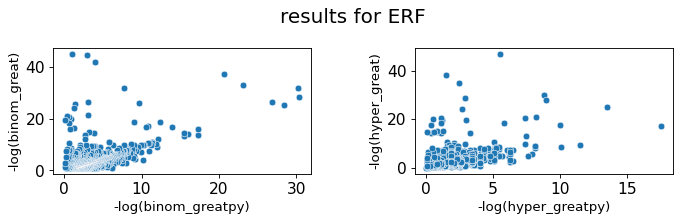

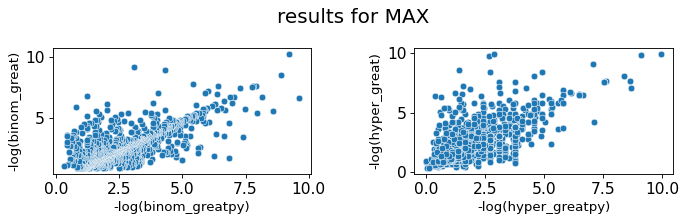

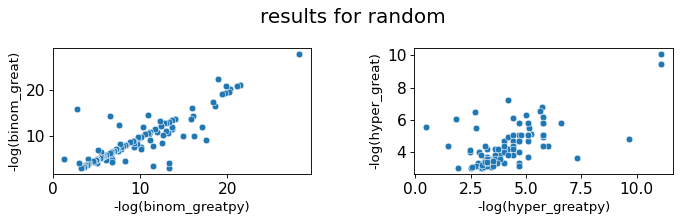

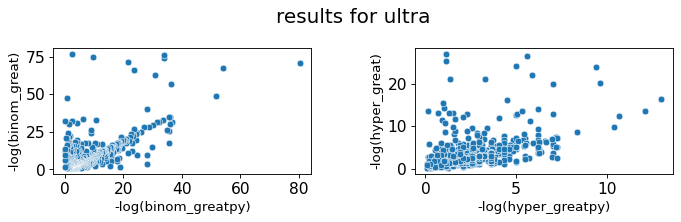

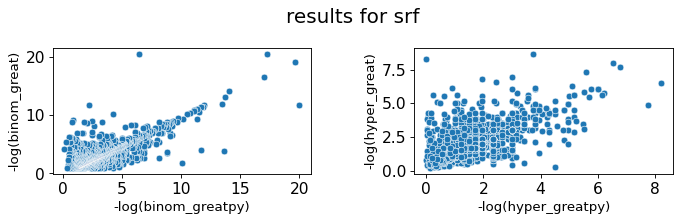

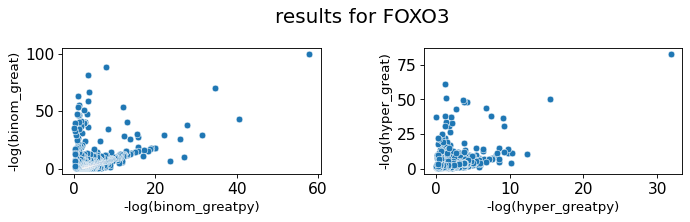

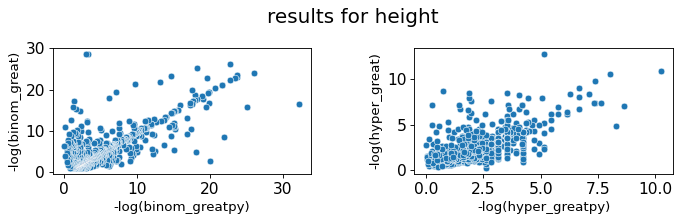

In [55]:
pp,asso,stat = great.pl.get_all_comparison(results)

## Great vs greatpy correlation

In [58]:
pd.options.display.float_format = '{:.2f}'.format

In [47]:
stat

,name,pearson_binom,pearson_hypergeom
0,ERF,0.58,0.61
1,MAX,0.60,0.67
2,random,0.24,0.12
3,ultra,0.53,0.68
4,srf,0.63,0.60
5,FOXO3,0.44,0.55
6,height,0.49,0.63


The correlation is not very good because we could not use the same ontology file as Great

The one we use is from a 2022 release while GREAT uses a 2012 file